<a href="https://colab.research.google.com/github/sanjeevm4788/Face-emotion-detection/blob/main/Face_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEEPFACE

In [1]:
pip install deepface

     |████████████████████████████████| 61kB 3.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3MB 16.4MB/s 
  Created wheel for gdown: filename=gdown-3.13.0-cp37-none-any.whl size=9046 sha256=5be630d4d92c2225cbf43e9596106cb8da48975be639e030d6d4c36562ccefeb
  Stored in directory: /root/.cache/pip/wheels/ba/fa/c5/12813d7496f34652c43a471e11a780e769889d06e34735c32e
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [2]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


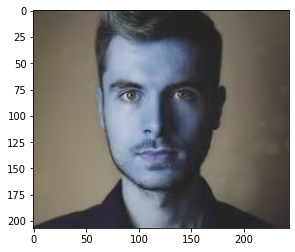

In [28]:
neutral=cv2.imread("neutral.jpg")
happy=cv2.imread("happyface.jpg")
plt.imshow(neutral)

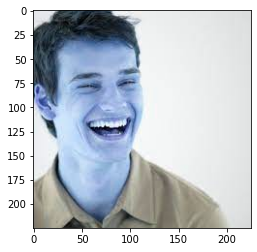

In [29]:
plt.imshow(happy)

DEEP LEARNING MODEL

In [16]:
def deep(image):
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    #Detecting the faces
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for(x, y, w, h) in faces:

        #Drawing rectangle over the face area
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,255, 0), 2)
        face = image[y:y + h, x:x + w]

        #predicting the emotion with deepface
        result = DeepFace.analyze(face, actions=['emotion'], enforce_detection=False)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image, result['dominant_emotion'], (x,y), font, 1, (0,0,225), 2, cv2.LINE_4)
    
        #Storing the image from gray to coloured
        coloured_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
     
    #Displaying image with it's corresponding emotion 
    return plt.imshow(coloured_img) 

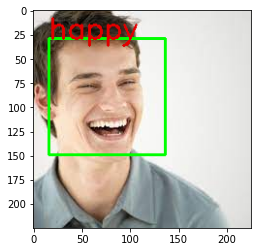

In [30]:
deep(happy)

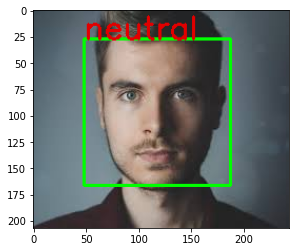

In [31]:
deep(neutral)

In [21]:
from tensorflow.keras.models import load_model
import numpy as np

In [36]:
neutral1=cv2.imread("neutral.jpg")
happy1=cv2.imread("happyface.jpg")

In [34]:
#loading the pre-trained model file
model = load_model('final_model.h5')

def dl_model(image):

    #Labels for the emotions
    class_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    #Detecting the faces
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for(x, y, w, h) in faces:

        #Drawing rectangle over the face area
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,255, 0), 2)
        face = gray[y:y + h, x:x + w]
        face = cv2.resize(face,(48,48))
        face = np.expand_dims(face,axis=0)
        face = face/255.0
        face = face.reshape(face.shape[0],48,48,1)

        #Predicting the emotion with the pre-trained model
        preds = model.predict(face)[0]
        label = class_labels[preds.argmax()]
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image, label, (x,y), font, 1, (0,0,225), 2, cv2.LINE_4)

        #Storing the image from gray to coloured
        coloured_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
     
    #Displaying image with it's corresponding emotion 
    return plt.imshow(coloured_img)

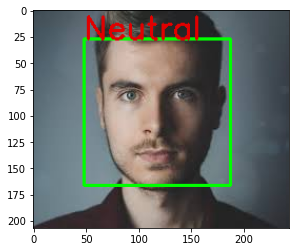

In [37]:
dl_model(neutral1)

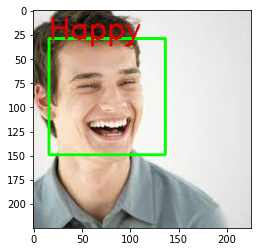

In [38]:
dl_model(happy1)